In [1]:
%matplotlib inline

from keras.layers import Dense
from keras.models import Sequential
from keras.optimizers import Adam
import numpy as np
import matplotlib.pyplot as plt
from model import create_meta_learner

np.random.seed(0)

def generate_points(slope, intercept, num_points):
    x = np.random.normal(size=(num_points))
    y = slope * x + intercept
    
    return x, y
    
def generator():
  params = np.array([[0.0, 0.0]])
  for i in range(1000):
    (slope, intercept) = tuple(np.random.normal(size=(2)))  
    
    train_x, train_y = generate_points(slope, intercept, 100)
    train_x = train_x.reshape((1, 10, 10, 1))
    train_y = train_y.reshape((1, 10, 10, 1))

    test_x, test_y = generate_points(slope, intercept, 10)
    test_x = test_x.reshape((1, 10, 1))
    test_y = test_y.reshape((1, 10, 1))

    yield [params, train_x, train_y, test_x], test_y

model = Sequential()
model.add(Dense(1, use_bias=True, input_shape=(1,)))
model.compile(loss='mse', optimizer='adam')

meta = create_meta_learner(model)
meta.compile(loss=model.loss, optimizer=Adam(lr=0.1, clipnorm=1.))
meta.fit_generator(generator(), steps_per_epoch=100, epochs=5)

Using TensorFlow backend.


Epoch 1/5
100/100 [==============================] - 5s - loss: 2425855312181400.0000     
Epoch 2/5
100/100 [==============================] - 4s - loss: 5.0843e-05     
Epoch 3/5
100/100 [==============================] - 4s - loss: 5.2071e-05     
Epoch 4/5
100/100 [==============================] - 4s - loss: 9.0144e-04     
Epoch 5/5
100/100 [==============================] - 5s - loss: 7.0665e-04     


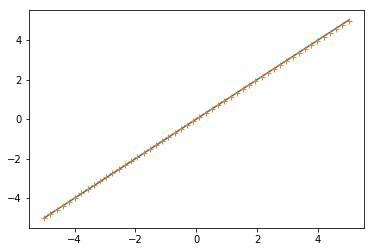

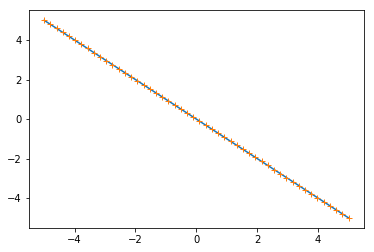

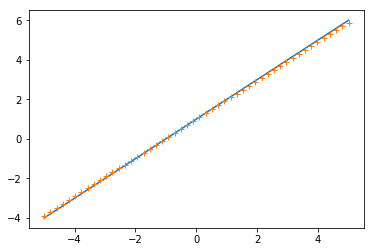

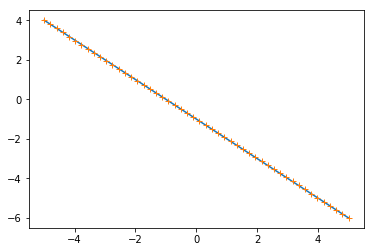

In [2]:
examples = [(1, 0), (-1, 0), (1, 1), (-1, -1)]

for (slope, intercept) in examples:
    x = np.linspace(-5, 5)
    
    params = np.array([[0., 0.]])
    train_x, train_y = generate_points(slope, intercept, 100)
    train_x = train_x.reshape((1, 10, 10, 1))
    train_y = train_y.reshape((1, 10, 10, 1))
    test_x = x.reshape((1, -1, 1))
    
    expected = slope * x + intercept
    predicted = meta.predict([params, train_x, train_y, test_x]).flatten()
    
    plt.plot(x, expected, '-')
    plt.plot(x, predicted, '+')
    plt.show()